In [ ]:
# Investigationg Fandango's Movie Ratings 

In [1]:
# In this project, I shall analyze a sample of data on movie 
# ratings by Fandango to check the difference between actual and 
# displayed ratings on their website. The goal of this analysis is 
# to determine whether there has been any change in the rating 
# system of Fandango. 
# I shall be working with two datasets, one that contains data 
# before Walt Hickey's analysis and one that contains data after
# his analysis 

In [3]:
# Reading in the two datasets 

import pandas as pd 

before_df = pd.read_csv("fandango_score_comparison.csv")
after_df = pd.read_csv("movie_ratings_16_17.csv")

before_df.shape

(146, 22)

In [4]:
after_df.shape

(214, 15)

In [5]:
# check the number of maximum displayed columns 

pd.get_option("display.max_columns")

20

In [9]:
# change the number of displayed columns to show all columns 

pd.set_option("display.max_columns", 25)

print(before_df.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  Metacritic_norm  Metacritic_user_nom  IMDB_norm  \
0     3.7

In [10]:
# Select the relevant columns and create a new dataframe using those 

before = before_df[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

after = after_df[['movie', 'year', 'fandango']].copy()

In [11]:
# The population of interest is all the movie ratings on Fandango's
# website, regardless of release year. The dataset is not representative 
# of our population of interest, so I shall tweak the goal of this 
# analysis. The new goal is to check if there is any difference in 
# ratings on Fandango's website for popular movie released in 2015 
# and for popular movies released in 2016. 
# For this analysis, a movie is considered "popular" if it has more
# than 30 fan ratings. 

In [13]:
# extracting column names 

print(before_df.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


In [16]:
below_30 = before_df[before_df["Fandango_votes"] < 30]
below_30.shape

(0, 22)

In [17]:
print(after_df.columns)

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [18]:
# For the second dataset, check the representativity of the dataset
# by sampling 10 movies and then checking the number of user ratings 
# on Fandango's website 

sample_after = after.sample(10, random_state = 1)
print(sample_after)

                                       movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5


In [26]:
# From the website, I have the number of fan ratings as of 2018 
# and will create a dataframe to represent them

data = [['Mechanic: Resurrection', 2247], ['Warcraft', 7271], ['Max Steel', 493], ['Me Before You', 5263], ['Fantastic Beasts and Where to Find Them', 13400], ['Cell', 17], ['Genius', 127], ['Sully', 11877], ['A Hologram for the King', 500], ['Captain America: Civil War', 35057]]
col_names = ['Movie', 'Fan ratings']
fan_ratings = pd.DataFrame(data, columns = col_names)
fan_ratings.head(10)

,Movie,Fan ratings
0,Mechanic: Resurrection,2247
1,Warcraft,7271
2,Max Steel,493
3,Me Before You,5263
4,Fantastic Beasts and Where to Find Them,13400
5,Cell,17
6,Genius,127
7,Sully,11877
8,A Hologram for the King,500
9,Captain America: Civil War,35057


In [27]:
# Now, isolate the movies released in 2015 and 2016 from both 
# datasets into two separate datasets 

before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [28]:
before["Year"] = before["FILM"].str[-5:-1]
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [29]:
year_15 = before[before["Year"] == "2015"].copy()
year_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [31]:
year_16 = after[after["year"] == 2016].copy()
year_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


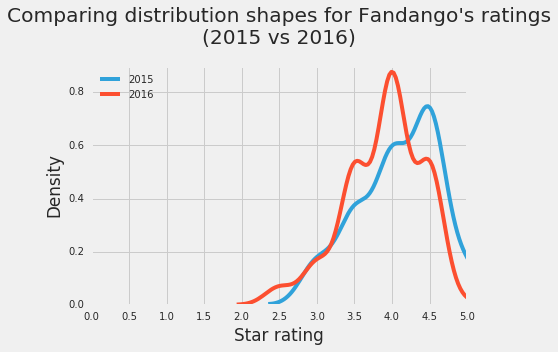

In [57]:
# Now, I shall create a Kernel Density Plot to examine the fan ratings 
# in both years to check if there is any difference in Fandango's ratings 

import seaborn as sns
from numpy import arange
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('fivethirtyeight')

sns.kdeplot(year_15["Fandango_Stars"], label = '2015', legend = True)
sns.kdeplot(year_16["fandango"],label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel("Star rating")
plt.ylabel("Density")
plt.xlim(0, 5)
plt.xticks(arange(0, 5.1, 0.5))
plt.yticks(arange(0, 1, 0.2))
plt.show()

In [48]:
year_15.shape

(129, 6)

In [49]:
year_16.shape

(191, 3)

In [58]:
# Now, I shall check the frequency distributions of both datasets 

freq_15 = year_15['Fandango_Stars'].value_counts()
freq_15

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [56]:
freq_16 = year_16['fandango'].value_counts()
freq_16

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

In [62]:
# Checking percentages instead 

year15_pcnt = year_15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100
year15_pcnt 

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [64]:
year16_pcnt = year_16['fandango'].value_counts(normalize = True).sort_index() * 100
year16_pcnt

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [73]:
# I will now compute some summary statistics for both datasets and 
# show them on a bar plot 

mean15 = year_15['Fandango_Stars'].mean()
median15 = year_15["Fandango_Stars"].median()
mode15 = year_15["Fandango_Stars"].mode().iloc[0]

print(mean15)
print(median15) 
print(mode15)

4.0852713178294575
4.0
4.5


In [74]:
mean16 = year_16['fandango'].mean()
median16 = year_16['fandango'].median()
mode16 = year_16['fandango'].mode().iloc[0]

print(mean16)
print(median16)
print(mode16)

3.887434554973822
4.0
4.0


In [75]:
summary = pd.DataFrame()

summary["2015"] = [mean15, median15, mode15]
summary["2016"] = [mean16, median16, mode16]

summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


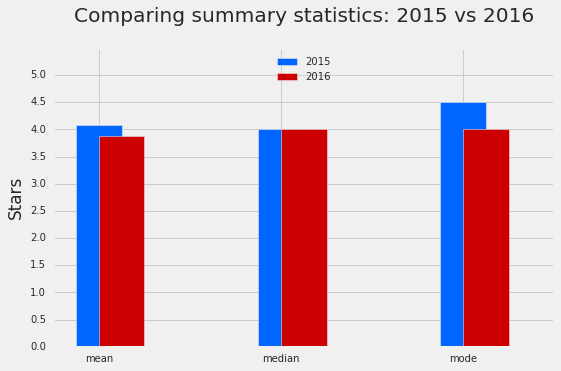

In [87]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [ ]:
# From this analysis, it is evident that there is a difference in Fandango movie ratings from 2015 and 2016.
# Popular movies released in 2016 had a lower rating on avareage than popular movies released 
# in 2015. 